In [1]:
   import pandas as pd
   

In [2]:
import os

# List files in the root input directory
print("Files in '/kaggle/input/':", os.listdir('/kaggle/input/'))

# List files in the working directory (your uploads are often here)
print("Files in '/kaggle/working/':", os.listdir('/kaggle/working'))



Files in '/kaggle/input/': ['burnout-datathon-ieeecsmuj', 'burnout-datasets']
Files in '/kaggle/working/': ['.virtual_documents']


In [3]:
import os

# Path to the burnout-datasets
data_path = '/kaggle/input/burnout-datasets'
print(os.listdir(data_path))


['sample_submission.csv', 'val.csv', 'train.csv', 'test.csv']


In [4]:
import pandas as pd

# Load the training dataset
train_df = pd.read_csv('/kaggle/input/burnout-datasets/train.csv')

# Display the first few rows of the training dataset
print(train_df.head())


   Unique ID  Rider_ID category_x  Circuit_Length_km  Laps  Grid_Position  \
0    1894944      2659      Moto2              4.874    22             17   
1      23438      5205      Moto2              3.875    24              7   
2     939678      7392      Moto3              5.647    25              5   
3    1196312      7894      Moto3              4.810    19              3   
4    1033899      6163     MotoGP              5.809    25             21   

   Avg_Speed_kmh Track_Condition  Humidity_% Tire_Compound_Front  ... air  \
0         264.66             Wet          61                Hard  ...  23   
1         177.56             Wet          77                Soft  ...  12   
2         317.74             Dry          87                Soft  ...  22   
3         321.82             Wet          43                Soft  ...  23   
4         239.92             Wet          47                Hard  ...  22   

  ground  starts  finishes with_points  podiums  wins  min_year  max_year 

In [5]:
# Check shape (rows, columns)
print("Dataset shape:", train_df.shape)

# Data types of each column
print("\nData types:\n", train_df.dtypes)

# Count of missing values per column
print("\nMissing values per column:\n", train_df.isnull().sum())


Dataset shape: (1914056, 45)

Data types:
 Unique ID                            int64
Rider_ID                             int64
category_x                          object
Circuit_Length_km                  float64
Laps                                 int64
Grid_Position                        int64
Avg_Speed_kmh                      float64
Track_Condition                     object
Humidity_%                           int64
Tire_Compound_Front                 object
Tire_Compound_Rear                  object
Penalty                             object
Championship_Points                  int64
Championship_Position                int64
Session                             object
year_x                               int64
sequence                             int64
rider                                int64
team                                 int64
bike                                 int64
position                             int64
points                             float64
shortname  

       Lap_Time_Seconds  Avg_Speed_kmh  Grid_Position
count      1.914056e+06   1.914056e+06   1.914056e+06
mean       9.000211e+01   2.496328e+02   1.149819e+01
std        1.153121e+01   5.773525e+01   6.334418e+00
min        7.000100e+01   1.500000e+02   1.000000e+00
25%        8.001300e+01   1.993500e+02   6.000000e+00
50%        8.998100e+01   2.496500e+02   1.200000e+01
75%        9.991700e+01   2.994600e+02   1.700000e+01
max        1.099990e+02   3.500000e+02   2.200000e+01


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


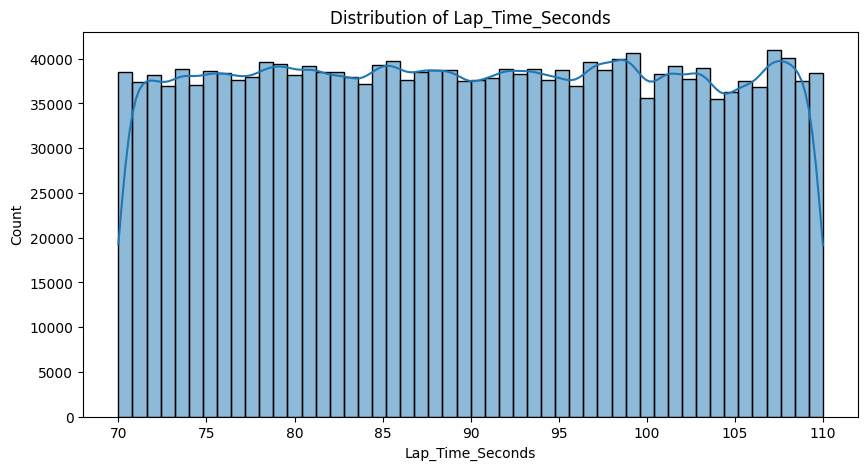

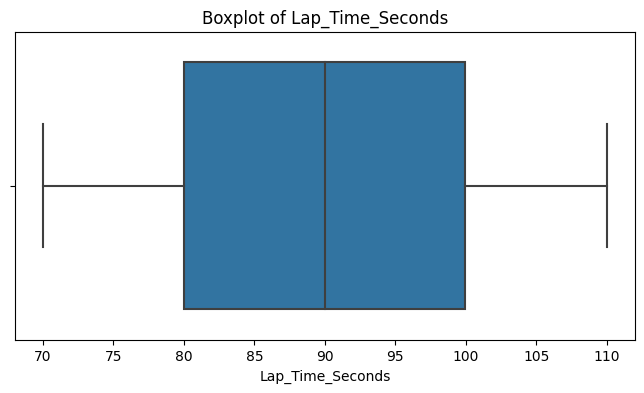

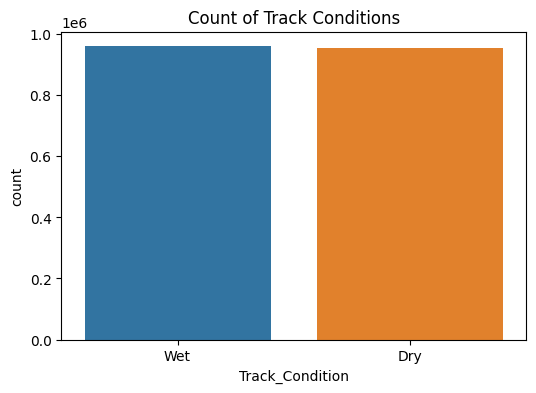

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics of key variables
print(train_df[['Lap_Time_Seconds', 'Avg_Speed_kmh', 'Grid_Position']].describe())

# Histogram of Lap_Time_Seconds
plt.figure(figsize=(10, 5))
sns.histplot(train_df['Lap_Time_Seconds'], bins=50, kde=True)
plt.title('Distribution of Lap_Time_Seconds')
plt.show()

# Boxplot for Lap_Time_Seconds to check outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_df['Lap_Time_Seconds'])
plt.title('Boxplot of Lap_Time_Seconds')
plt.show()

# Count plot for Track_Condition (categorical)
plt.figure(figsize=(6, 4))
sns.countplot(x='Track_Condition', data=train_df)
plt.title('Count of Track Conditions')
plt.show()


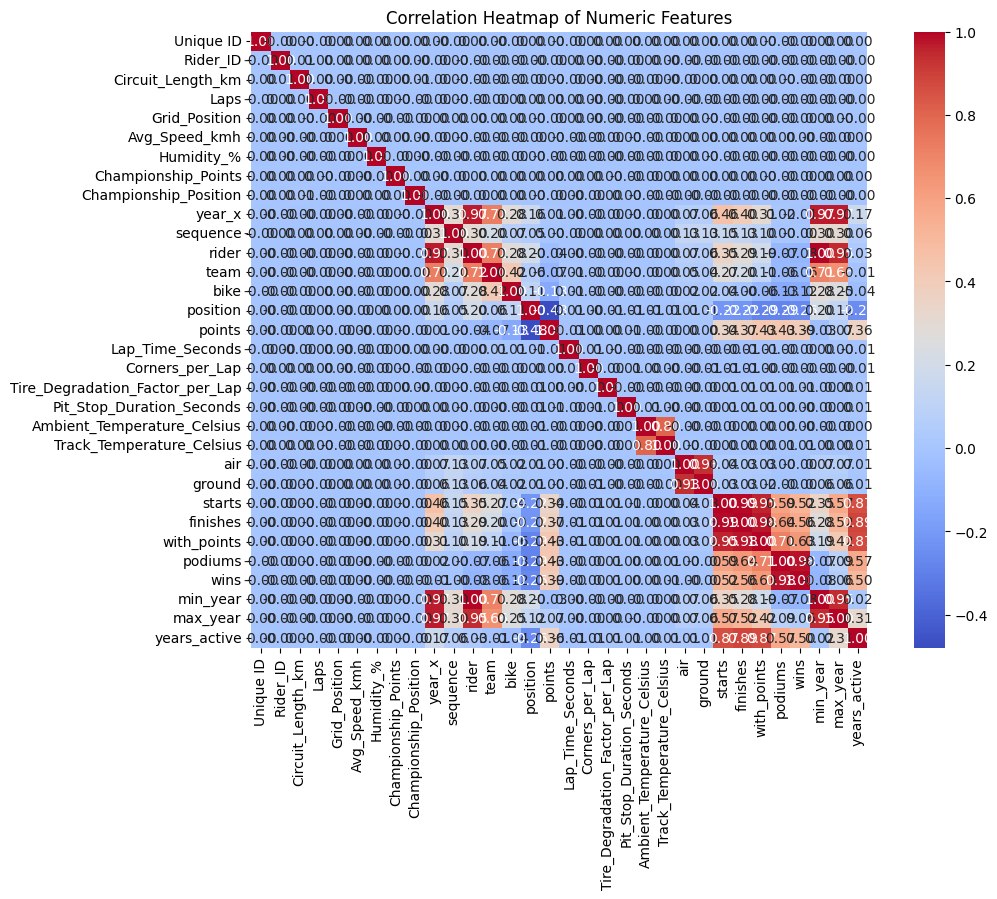

In [7]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numeric features
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [8]:
# Extract correlations with target variable Lap_Time_Seconds
target_corr = correlation_matrix['Lap_Time_Seconds'].sort_values(ascending=False)

# Filter strong correlations (threshold can be adjusted)
strong_corr = target_corr[(target_corr > 0.6) | (target_corr < -0.6)]

print("Features strongly correlated with Lap_Time_Seconds:\n", strong_corr)


Features strongly correlated with Lap_Time_Seconds:
 Lap_Time_Seconds    1.0
Name: Lap_Time_Seconds, dtype: float64


In [9]:
# Display the full correlation matrix for numeric features
print(correlation_matrix)


                                 Unique ID  Rider_ID  Circuit_Length_km  \
Unique ID                         1.000000 -0.000891       1.601783e-04   
Rider_ID                         -0.000891  1.000000       5.726370e-03   
Circuit_Length_km                 0.000160  0.005726       1.000000e+00   
Laps                             -0.000548  0.003629       2.928456e-03   
Grid_Position                     0.000237  0.003464       1.986450e-03   
Avg_Speed_kmh                     0.000237  0.002617      -2.713121e-04   
Humidity_%                        0.000424  0.002392      -2.482564e-03   
Championship_Points               0.000910  0.003910       2.574526e-03   
Championship_Position             0.000878  0.000227       8.845835e-03   
year_x                            0.000647 -0.000578      -5.945238e-04   
sequence                         -0.000222  0.000428       3.292900e-04   
rider                             0.000364 -0.000401      -9.468424e-04   
team                     

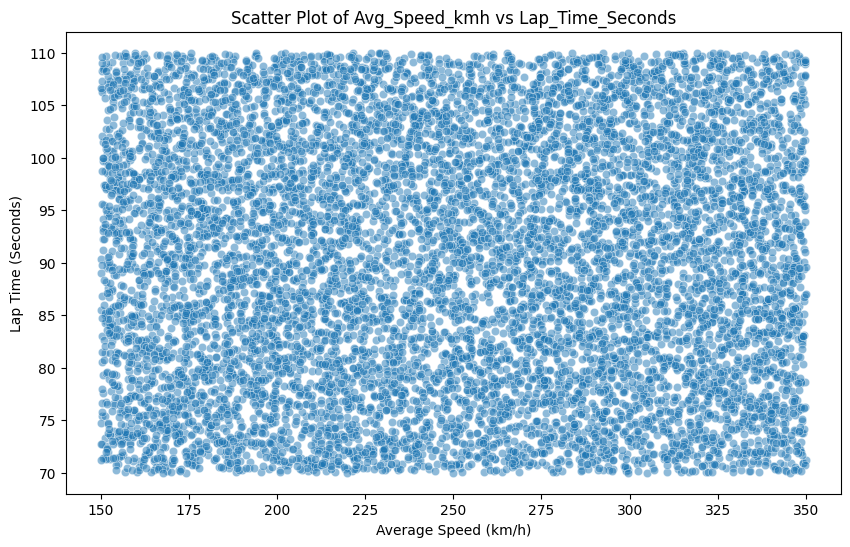

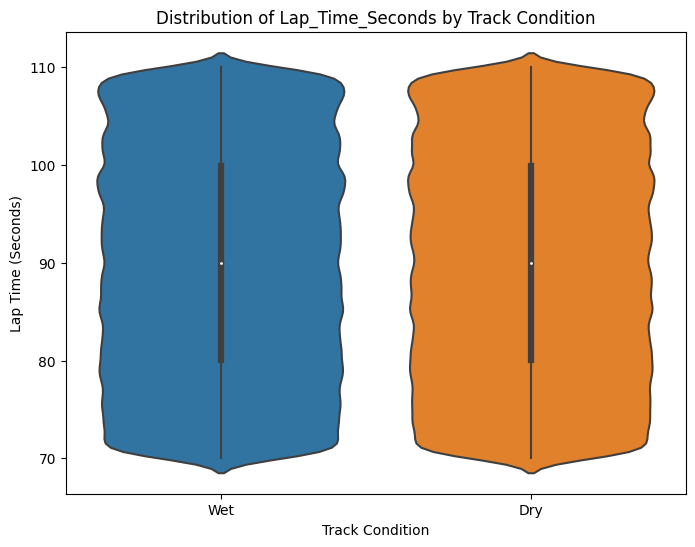

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Avg_Speed_kmh vs Lap_Time_Seconds
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df.sample(10000, random_state=42), x='Avg_Speed_kmh', y='Lap_Time_Seconds', alpha=0.5)
plt.title('Scatter Plot of Avg_Speed_kmh vs Lap_Time_Seconds')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Lap Time (Seconds)')
plt.show()

# Violin plot: Distribution of Lap_Time_Seconds by Track_Condition
plt.figure(figsize=(8, 6))
sns.violinplot(data=train_df, x='Track_Condition', y='Lap_Time_Seconds')
plt.title('Distribution of Lap_Time_Seconds by Track Condition')
plt.xlabel('Track Condition')
plt.ylabel('Lap Time (Seconds)')
plt.show()


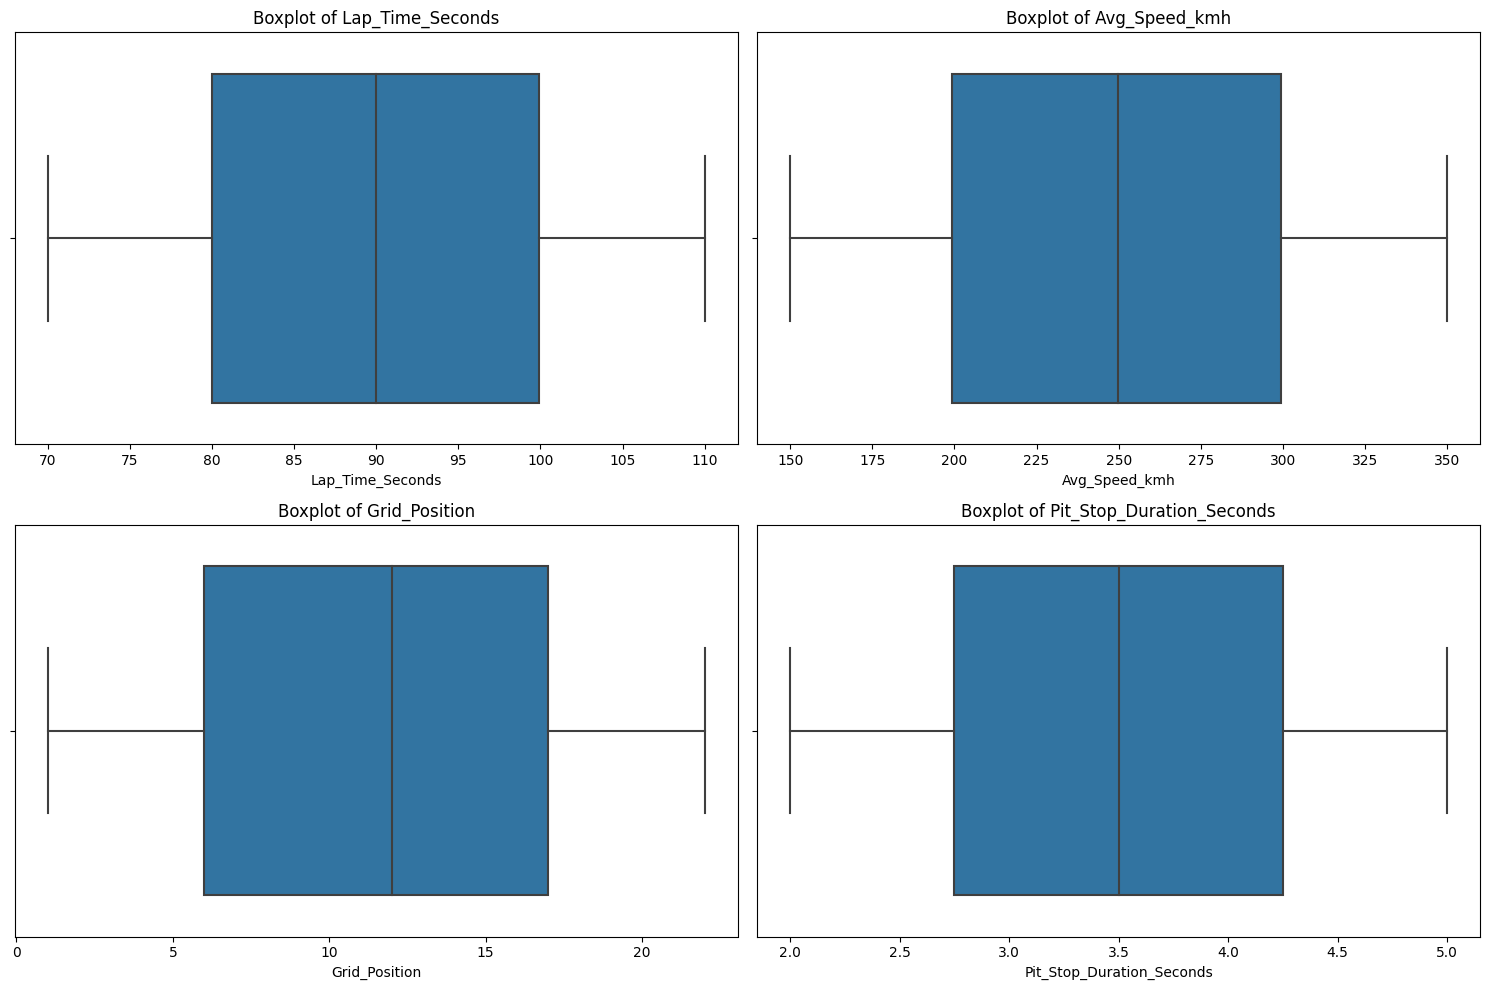

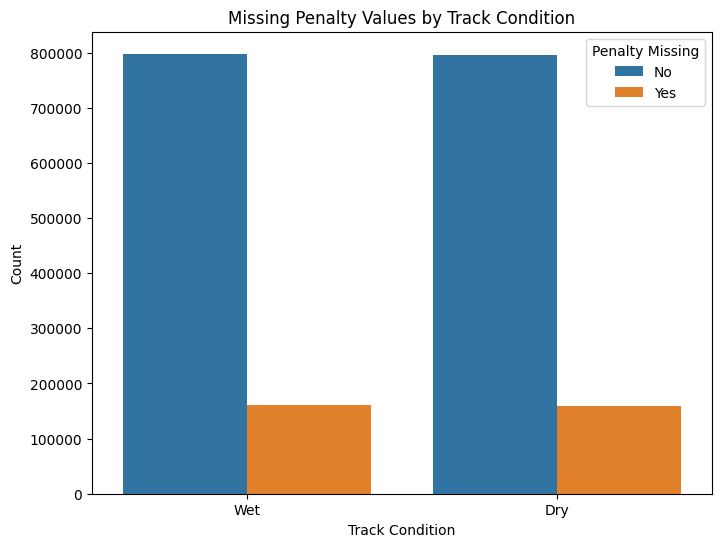

In [11]:
# Boxplots for key numeric features to identify outliers
features_to_check = ['Lap_Time_Seconds', 'Avg_Speed_kmh', 'Grid_Position', 'Pit_Stop_Duration_Seconds']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Create a new column to indicate if the Penalty is missing
train_df['Penalty_Missing'] = train_df['Penalty'].isnull().astype(int)  # Convert boolean to int (0 or 1)

# Countplot for missing penalty values by Track Condition
plt.figure(figsize=(8, 6))
sns.countplot(x='Track_Condition', hue='Penalty_Missing', data=train_df)
plt.title('Missing Penalty Values by Track Condition')
plt.xlabel('Track Condition')
plt.ylabel('Count')
plt.legend(title='Penalty Missing', labels=['No', 'Yes'])
plt.show()


In [12]:
# Calculate the average lap time
average_lap_time = train_df['Lap_Time_Seconds'].mean()

print("Average Lap Time (in seconds):", average_lap_time)


Average Lap Time (in seconds): 90.00211362206748


In [13]:
import numpy as np

# Extract actual lap times
actual_lap_times = train_df['Lap_Time_Seconds'].values

# Use the average lap time as the predicted value
predicted_lap_times = np.full(actual_lap_times.shape, average_lap_time)

# Calculate RMSE
rmse = np.sqrt(np.mean((actual_lap_times - predicted_lap_times) ** 2))

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 11.531209172069012


In [14]:
    if os.path.exists(data_path):
        print(os.listdir(data_path))
    else:
        print("Directory does not exist.")
    

['sample_submission.csv', 'val.csv', 'train.csv', 'test.csv']


In [15]:
    file_path = '/kaggle/input/burnout-datasets/train.csv'
    if os.path.isfile(file_path):
        train_df = pd.read_csv(file_path)
    else:
        print("File not found.")
    

In [16]:
import pandas as pd

# Load the training dataset
train_df = pd.read_csv('/kaggle/input/burnout-datasets/train.csv')

# Display the first few rows of the training dataset
print(train_df.head())


   Unique ID  Rider_ID category_x  Circuit_Length_km  Laps  Grid_Position  \
0    1894944      2659      Moto2              4.874    22             17   
1      23438      5205      Moto2              3.875    24              7   
2     939678      7392      Moto3              5.647    25              5   
3    1196312      7894      Moto3              4.810    19              3   
4    1033899      6163     MotoGP              5.809    25             21   

   Avg_Speed_kmh Track_Condition  Humidity_% Tire_Compound_Front  ... air  \
0         264.66             Wet          61                Hard  ...  23   
1         177.56             Wet          77                Soft  ...  12   
2         317.74             Dry          87                Soft  ...  22   
3         321.82             Wet          43                Soft  ...  23   
4         239.92             Wet          47                Hard  ...  22   

  ground  starts  finishes with_points  podiums  wins  min_year  max_year 

In [17]:
    file_path = '/kaggle/input/burnout-datasets/train.csv'
    if os.path.isfile(file_path):
        train_df = pd.read_csv(file_path)
    else:
        print("File not found.")
    

In [18]:
    train_df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914056 entries, 0 to 1914055
Data columns (total 45 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unique ID                        int64  
 1   Rider_ID                         int64  
 2   category_x                       object 
 3   Circuit_Length_km                float64
 4   Laps                             int64  
 5   Grid_Position                    int64  
 6   Avg_Speed_kmh                    float64
 7   Track_Condition                  object 
 8   Humidity_%                       int64  
 9   Tire_Compound_Front              object 
 10  Tire_Compound_Rear               object 
 11  Penalty                          object 
 12  Championship_Points              int64  
 13  Championship_Position            int64  
 14  Session                          object 
 15  year_x                           int64  
 16  sequence                         int64  
 17  rider   

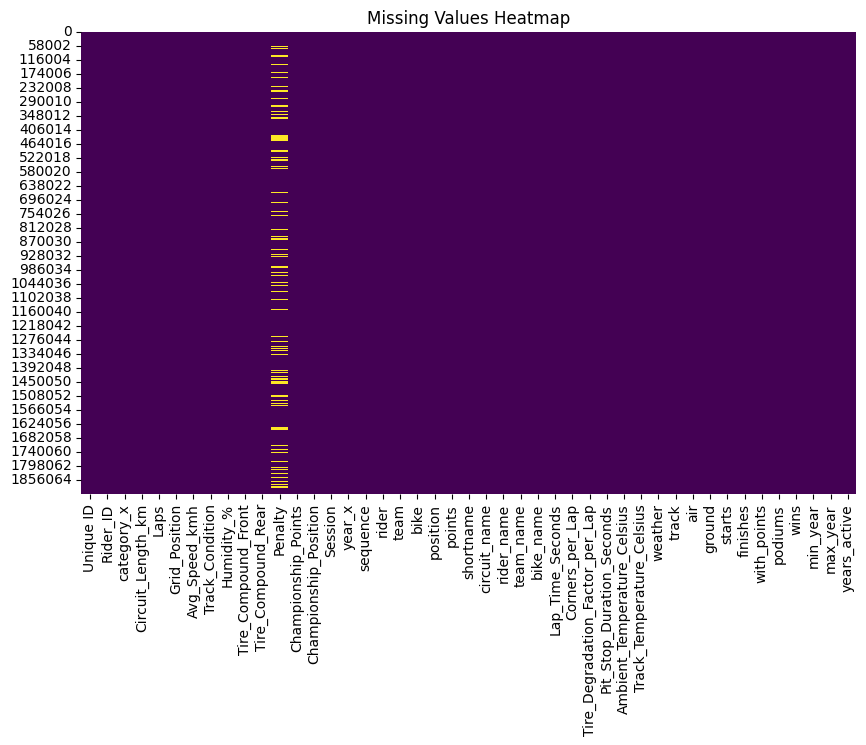

In [19]:
    plt.figure(figsize=(10, 6))
    sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
    

In [20]:
# Create Penalty_Missing flag if not already created
if 'Penalty_Missing' not in train_df.columns:
    train_df['Penalty_Missing'] = train_df['Penalty'].isnull().astype(int)

# Fill missing Penalty values with "No Penalty"
train_df['Penalty'] = train_df['Penalty'].fillna('No Penalty')

# Check the effect
print(train_df['Penalty'].value_counts())
print(train_df['Penalty_Missing'].value_counts())


Penalty
DNS             321908
No Penalty      321292
+3s             320314
DNF             318145
Ride Through    316548
+5s             315849
Name: count, dtype: int64
Penalty_Missing
0    1592764
1     321292
Name: count, dtype: int64


In [21]:
# List of categorical features to encode
categorical_features = [
    'category_x', 
    'Track_Condition', 
    'Tire_Compound_Front', 
    'Tire_Compound_Rear', 
    'Penalty', 
    'Session', 
    'weather', 
    'shortname', 
    'circuit_name', 
    'rider_name', 
    'team_name', 
    'bike_name'
]

# One-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)

# Check the new shape of the DataFrame
print("New shape of the DataFrame after encoding:", train_df_encoded.shape)


New shape of the DataFrame after encoding: (1914056, 4137)


In [22]:
import pandas as pd
import xgboost as xgb


In [23]:
import pandas as pd

# Load validation dataset (adjust path if different)
val_df = pd.read_csv('/kaggle/input/burnout-datasets/val.csv')

# Verify loading
print(val_df.head())



   Unique ID  Rider_ID category_x  Circuit_Length_km  Laps  Grid_Position  \
0    1733872      6065      Moto2              4.248    24              5   
1    1778161      5781      Moto2              4.907    20              2   
2    1205004      3780      Moto2              4.162    24             15   
3     578473      8193     MotoGP              3.889    18              3   
4    2248803      1632      Moto2              4.088    24             19   

   Avg_Speed_kmh Track_Condition  Humidity_% Tire_Compound_Front  ... air  \
0         293.12             Wet          33                Hard  ...  22   
1         310.31             Wet          32                Soft  ...  26   
2         237.39             Wet          89              Medium  ...  28   
3         275.55             Wet          32                Soft  ...  22   
4         297.81             Wet          59                Soft  ...  26   

  ground  starts  finishes with_points  podiums  wins  min_year  max_year 

In [24]:
# Calculate the average lap time
average_lap_time = train_df['Lap_Time_Seconds'].mean()
print("Average Lap Time (in seconds):", average_lap_time)

# Extract actual lap times
actual_lap_times = train_df['Lap_Time_Seconds'].values

# Use the average lap time as the predicted value
predicted_lap_times = np.full(actual_lap_times.shape, average_lap_time)

# Calculate RMSE
rmse = np.sqrt(np.mean((actual_lap_times - predicted_lap_times) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)


Average Lap Time (in seconds): 90.00211362206748
Root Mean Squared Error (RMSE): 11.531209172069012


In [25]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv('/kaggle/input/burnout-datasets/test.csv')

# Example prediction: use the average lap time from the training data as prediction
average_lap_time = train_df['Lap_Time_Seconds'].mean()
predictions = [average_lap_time] * len(test_df)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'Unique ID': test_df['Unique ID'],
    'Lap_Time_Seconds': predictions
})

# Save the submission file
submission.to_csv('solution.csv', index=False)
print("Submission file 'solution.csv' has been created.")


Submission file 'solution.csv' has been created.
